## **In this program we have determined the relation between two Numerical Columns ('cf_rating' and 'cc_rating') of the dataset 'Final_cf.csv' without using scikit learn.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final_cf.csv')
df.head()

,ss_username,cf_username,cf_rating,cc_username,cc_rating
0,eldnahon,slime,3449.0,peehs_moorhsum,3007.0
1,jora,NaN,NaN,uwi,2906.0
2,lala,NaN,NaN,kal013,2756.0
3,wesnerm,NaN,NaN,wmoise,2696.0
4,grebnesieh,grebnesieh,1703.0,grebnesieh,2673.0


In [4]:
df.shape

(11275, 5)

In [5]:
df.columns

Index(['ss_username', 'cf_username', 'cf_rating', 'cc_username', 'cc_rating'], dtype='object')

**Removing Nan Values**

In [6]:
y=df['cf_rating']
x=df['cc_rating']
print('Values cc :',len(x),'Values cf :',len(y))
x=x.dropna()
y=y.dropna()
print("Removing nan cc :",len(x),"Removing nan cf :",len(y))

Values cc : 11275 Values cf : 11275
Removing nan cc : 10280 Removing nan cf : 7437


**As no. of CC entries and no. of CF entries are not equal, we cannot directly use this. Instead, we only take users who have both CC and CF ratings.**

In [7]:
df_1=df.dropna()
print(df_1.shape)
y=df_1['cf_rating']
x=df_1['cc_rating']

(6442, 5)


**We get 6442 entries who have both CC and CF data available.**

**Now we plot a scatter plot between Codechef and Codeforces Rating.**

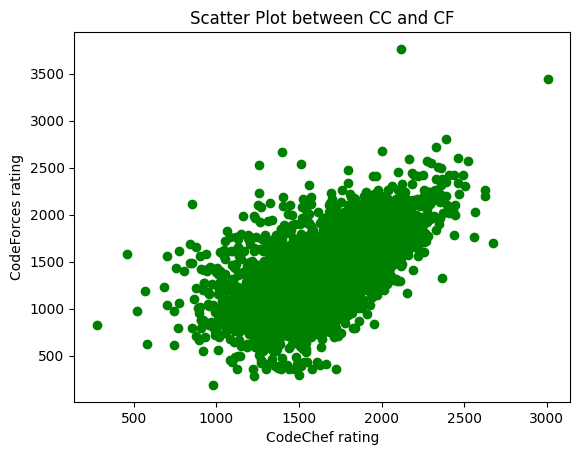

In [8]:
plt.scatter(x,y,color='green')
plt.title("Scatter Plot between CC and CF")
plt.xlabel('CodeChef rating')
plt.ylabel('CodeForces rating')
plt.show()

**We plot a regression plot to determine the best fitted line with minimum error.**

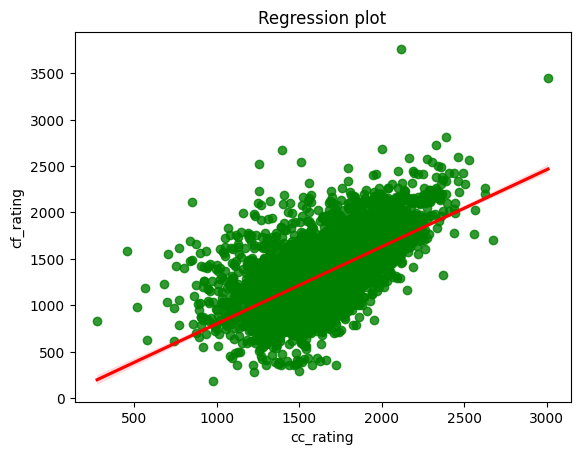

In [9]:
sns.regplot(x=x,y=y,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('Regression plot')
plt.show()

**Now we define the main program to determine the relation between Codechef and Codeforces rating.**

Estimated coefficients:
Constant b_0 = -32.62926507315615
Slope of graph b_1 = 0.8315620555789324


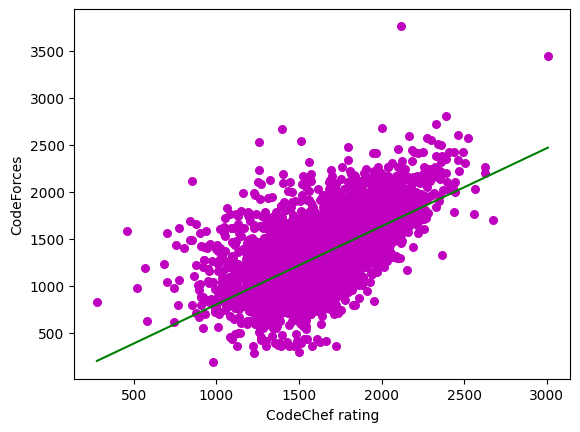

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)

def plot_regression_line(x, y, b):
    plt.scatter(x, y, color = "m",marker = "o", s = 30)

    # Plotting Regression line with predicted response vector
    y_pred = b[0] + b[1]*x
    plt.plot(x, y_pred, color = "g")
    plt.xlabel('CodeChef rating')
    plt.ylabel('CodeForces')
    plt.show()

b = estimate_coef(x, y)
print("Estimated coefficients:")
print("Constant b_0 =",b[0])
print("Slope of graph b_1 =",b[1])

# plotting regression line
plot_regression_line(x, y, b)


**Finally we have determined the slope and constant value of the best fitted line.**

**Now we test our machine learning model on some random values.**

In [11]:
b_0 = -32.62926507315615
b_1 = 0.8315620555789324

def fun(codechef_rating):
    codeforces_rating=(codechef_rating*b_1)+b_0
    return codeforces_rating

for z in range(700,2100,50):
    print("Codechef :",z,"Codeforces :",round(fun(z),2))

Codechef : 700 Codeforces : 549.46
Codechef : 750 Codeforces : 591.04
Codechef : 800 Codeforces : 632.62
Codechef : 850 Codeforces : 674.2
Codechef : 900 Codeforces : 715.78
Codechef : 950 Codeforces : 757.35
Codechef : 1000 Codeforces : 798.93
Codechef : 1050 Codeforces : 840.51
Codechef : 1100 Codeforces : 882.09
Codechef : 1150 Codeforces : 923.67
Codechef : 1200 Codeforces : 965.25
Codechef : 1250 Codeforces : 1006.82
Codechef : 1300 Codeforces : 1048.4
Codechef : 1350 Codeforces : 1089.98
Codechef : 1400 Codeforces : 1131.56
Codechef : 1450 Codeforces : 1173.14
Codechef : 1500 Codeforces : 1214.71
Codechef : 1550 Codeforces : 1256.29
Codechef : 1600 Codeforces : 1297.87
Codechef : 1650 Codeforces : 1339.45
Codechef : 1700 Codeforces : 1381.03
Codechef : 1750 Codeforces : 1422.6
Codechef : 1800 Codeforces : 1464.18
Codechef : 1850 Codeforces : 1505.76
Codechef : 1900 Codeforces : 1547.34
Codechef : 1950 Codeforces : 1588.92
Codechef : 2000 Codeforces : 1630.49
Codechef : 2050 Codef